<a href="https://colab.research.google.com/github/Kaviyakannan06/Machine-Learning-algorithms/blob/main/DB_Scan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

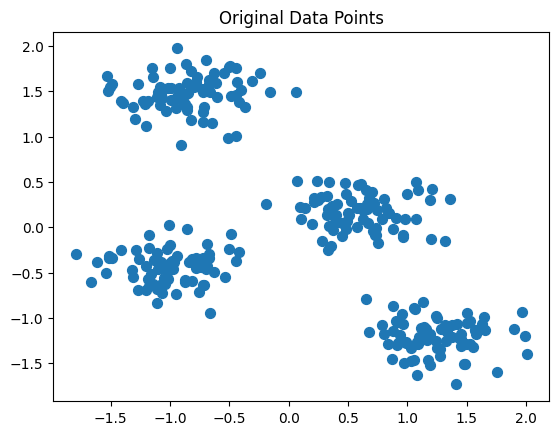

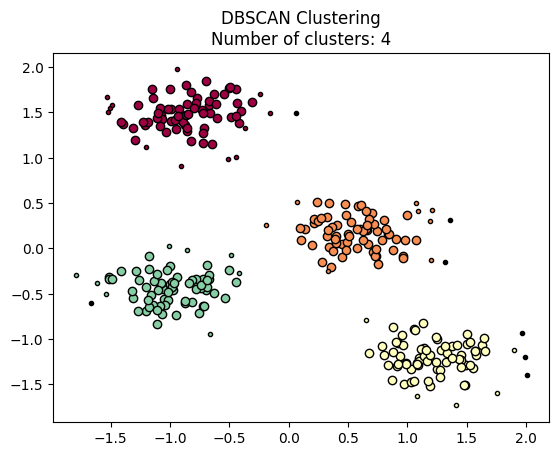

Silhouette Coefficient: 0.69
Adjusted Rand Index: 0.97


AttributeError: module 'sklearn.metrics' has no attribute 'homogeneit'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score  # ✅ FIXED: Import added

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
X = StandardScaler().fit_transform(X)

# Plot the initial data points
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Original Data Points")
plt.show()

# DBSCAN model
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters (ignoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Create colors dynamically based on the number of clusters
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the clusters
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core points
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    # Border points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title(f'DBSCAN Clustering\nNumber of clusters: {n_clusters_}')
plt.show()

# Evaluation Metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.2f" % sc)

ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

homogeneity = metrics.homogeneit

